In [6]:
import pandas as pd
df_svr = pd.read_csv('/mnt/data/macaulay/datas/genepedia/A_metrics_epoch_20.csv')
df_svr

,Epoch,Correlation_Coefficient,P_Value,Test_Loss
0,20.01000,-0.208059,0.269900,0.207108
1,20.02000,0.056962,0.764956,0.028696
2,20.03000,-0.264135,0.158408,0.135143
3,20.04000,-0.050299,0.791809,0.017147
4,20.05000,0.029657,0.876371,0.055082
...,...,...,...,...
17538,20.17539,0.046456,0.807410,0.020466
17539,20.17540,0.105643,0.578484,0.026285
17540,20.17541,-0.151504,0.424181,0.372827
17541,20.17542,0.086740,0.648556,0.009550


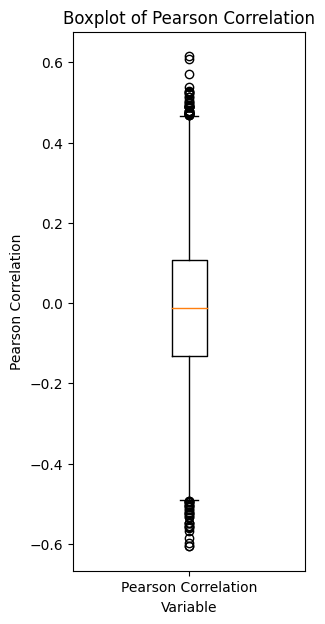

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the Pearson correlation data
pearson_data = df_svr['Correlation_Coefficient']

# Create a boxplot
plt.figure(figsize=(3,7))
plt.boxplot(pearson_data)
plt.title('Boxplot of Pearson Correlation')
plt.xlabel('Variable')
plt.ylabel('Pearson Correlation')
plt.xticks([1], ['Pearson Correlation'])

plt.show()

In [8]:
mean = df_svr['Correlation_Coefficient'].mean()
mean

-0.012420428235516322

In [9]:
positive_count = (df_svr['Correlation_Coefficient'] > 0).sum()
negative_count = (df_svr['Correlation_Coefficient'] < 0).sum()

print(f'Number of positive correlations: {positive_count}')
print(f'Number of negative correlations: {negative_count}')

Number of positive correlations: 8316
Number of negative correlations: 9227


In [54]:
positive_count = (df_svr['pearson_correlation'] >= 0.4).sum()
negative_count = (df_svr['pearson_correlation'] < 0.4).sum()

print(f'Number of values higher than 0.4: {positive_count}')
print(f'Number of values lesser than 0.4: {negative_count}')

Number of values higher than 0.4: 105
Number of values lesser than 0.4: 17774


epoch
epoch
epoch
epoch
epoch
epoch
epoch
epoch
epoch
epoch
epoch
epoch
epoch
epoch
epoch
epoch
epoch
epoch
epoch
epoch


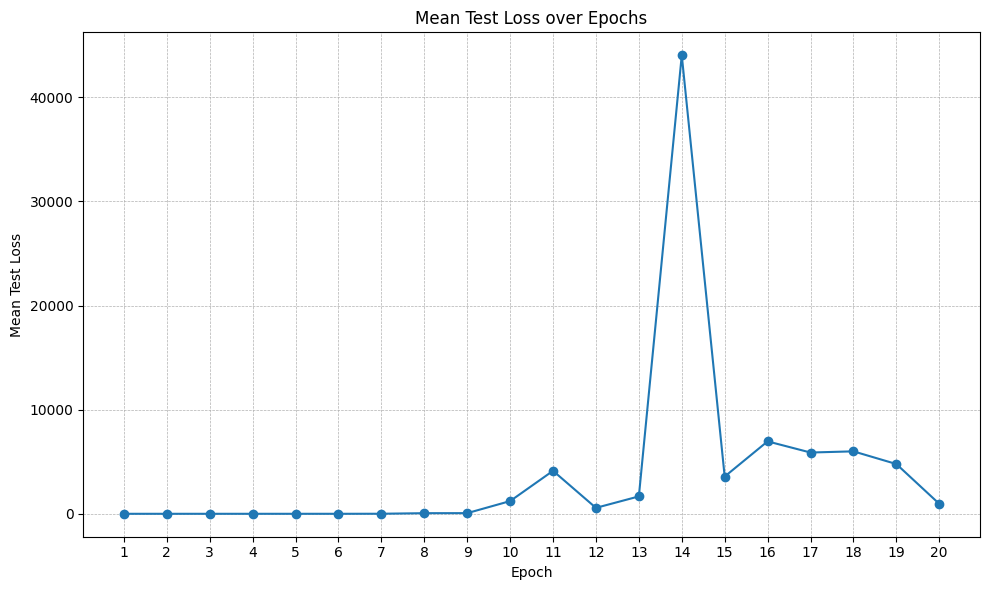

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


mean_losses = []


for epoch in range(1, 21):
    print('epoch')
    file_path = f'/mnt/data/macaulay/model_state2/A_metrics_epoch_{epoch}.csv'
    df = pd.read_csv(file_path)
    mean_loss = df['Test_Loss'].mean()
    mean_losses.append(mean_loss)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), mean_losses, marker='o', linestyle='-')
plt.title("Mean Test Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Test Loss")
plt.xticks(range(1, 21))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [10]:
mean_losses

[0.21540071426860583,
 0.18501828468387668,
 0.17644029317484966,
 0.21372170011422792,
 0.17148704729724598,
 0.43348622512953083,
 4.598946281105034,
 59.00648300681319,
 63.126122234664194,
 1220.748166136526,
 4128.473543919958,
 570.0695344987176,
 1671.4491413355156,
 44045.59197094703,
 3577.1654741990637,
 6956.621868172976,
 5885.304196654373,
 5998.754551430569,
 4780.9462923497795,
 961.3215251113998]

In [13]:
mean_losses_df = pd.DataFrame(mean_losses, columns=['mean_losses'])
mean_losses_df

,mean_losses
0,0.215401
1,0.185018
2,0.176440
3,0.213722
4,0.171487
5,0.433486
6,4.598946
7,59.006483
8,63.126122
9,1220.748166


In [18]:
df_train_loss = pd.read_csv('/mnt/data/macaulay/datas/average_training_losses.csv')
df_train_loss

,Training_Loss
0,0.065873
1,0.057005
2,0.053165
3,0.051751
4,0.051360
5,0.053615
6,0.055394
7,0.059353
8,0.065249
9,0.064064


In [19]:
df_losses = pd.concat([df_train_loss, mean_losses_df], axis=1)
df_losses

,Training_Loss,mean_losses
0,0.065873,0.215401
1,0.057005,0.185018
2,0.053165,0.176440
3,0.051751,0.213722
4,0.051360,0.171487
5,0.053615,0.433486
6,0.055394,4.598946
7,0.059353,59.006483
8,0.065249,63.126122
9,0.064064,1220.748166


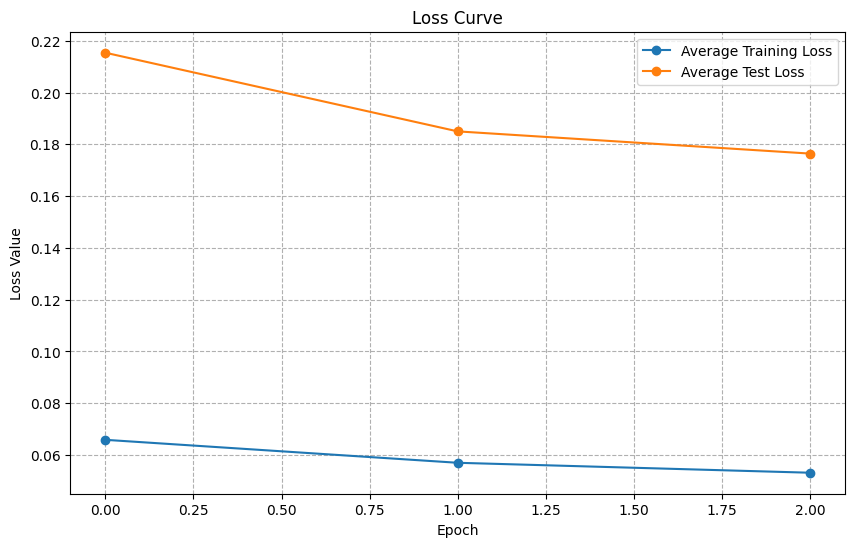

In [27]:
# Plot the data
# plt.figure(figsize=(10, 6))
# plt.plot(df['Training_Loss'], label='Average Training Loss', marker='o')
# plt.plot(df['mean_losses'], label='Mean Losses', marker='o')
# plt.title('Loss Curve')
# plt.xlabel('Epoch')
# plt.ylabel('Loss Value')
# plt.legend()
# plt.yscale('log')  # Using a logarithmic scale for y-axis due to the high variance in loss values
# plt.grid(True, which="both", ls="--")
# # Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_losses['Training_Loss'].iloc[:3], label='Average Training Loss', marker='o')
plt.plot(df_losses['mean_losses'].iloc[:3], label='Average Test Loss', marker='o')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

In [ ]:

# each_gene_losses = []


# for epoch in range(1, 21):
#     file_path = f'/mnt/data/macaulay/model_state2/A_metrics_epoch_{epoch}.csv'
#     df = pd.read_csv(file_path)
#     each_gene_loss = df['Test_Loss'].iloc[1]
#     each_gene_losses.append(each_gene_loss)


# plt.figure(figsize=(10, 6))
# plt.plot(range(1, 21), each_gene_losses, marker='o', linestyle='-')
# plt.title("Each gene Test Loss over Epochs")
# plt.xlabel("Epoch")
# plt.ylabel(" Test Loss")
# plt.xticks(range(1, 21))
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.tight_layout()
# plt.show()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

for i in range(1, 2):

    file_A = pd.read_csv(f'/mnt/data/macaulay/model_state2/A_metrics_epoch_{i}.csv')
    file_B = pd.read_csv(f'/mnt/data/macaulay/model_state2/B_metrics_epoch_{i}.csv')
    file_C = pd.read_csv(f'/mnt/data/macaulay/model_state2/C_metrics_epoch_{i}.csv')

    data = [file_A["Correlation_Coefficient"], file_B["Correlation_Coefficient"], file_C["Correlation_Coefficient"]]

    positive_count_A = (file_A["Correlation_Coefficient"] > 0).sum()
    negative_count_A= (file_A["Correlation_Coefficient"] < 0).sum()
    positive_count_B = (file_B["Correlation_Coefficient"] > 0).sum()
    negative_count_B= (file_B["Correlation_Coefficient"] < 0).sum()
    positive_count_C = (file_C["Correlation_Coefficient"] > 0).sum()
    negative_count_C = (file_C["Correlation_Coefficient"] < 0).sum()

    print('=====================================================')
    print(f'Number of positive values for A: {positive_count_A}')
    print(f'Number of negative valuesfor A: {negative_count_A}')
    print('=====================================================')
    print(f'Number of positive values for B: {positive_count_B}')
    print(f'Number of negative valuesfor B: {negative_count_B}')
    print('=====================================================')
    print(f'Number of positive values for C: {positive_count_C}')
    print(f'Number of negative valuesfor C: {negative_count_C}')


    plt.figure(figsize=(5, 5))
    plt.boxplot(data, vert=True, patch_artist=True, labels=['A (Test Cell line + Train gene)', 
                                                        'B (Train cell line + Test gene)', 
                                                        'C (Test cell line +Test gene)'])
    plt.title(f'Boxplot of all Correlation Coefficients of Epoch {i}')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation=15)
    plt.tight_layout()

    plt.show()



    # Calculate and print the median value
    medians = [np.median(file_A["Correlation_Coefficient"]), np.median(file_B["Correlation_Coefficient"]), np.median(file_C["Correlation_Coefficient"])]
    for i, median in enumerate(medians):
        plt.text(i + 1, median, f"Median: {median:.2f}", verticalalignment='bottom', horizontalalignment='left')

    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/macaulay/model_state2/A_metrics_epoch_1.csv'

Number of positive values for A: 8595
Number of negative valuesfor A: 8948
Number of positive values for B: 45
Number of negative valuesfor B: 55
Number of positive values for C: 44
Number of negative valuesfor C: 56


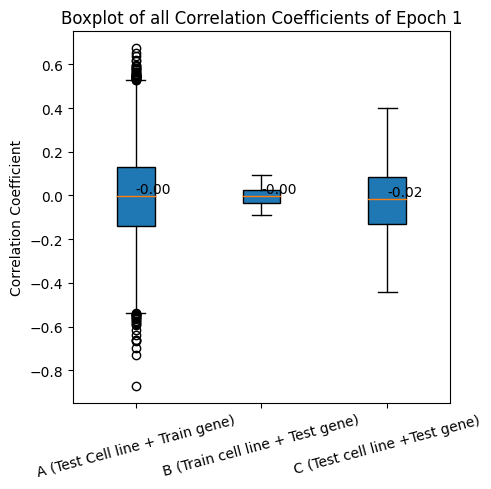

Number of positive values for A: 8632
Number of negative valuesfor A: 8911
Number of positive values for B: 62
Number of negative valuesfor B: 38
Number of positive values for C: 43
Number of negative valuesfor C: 57


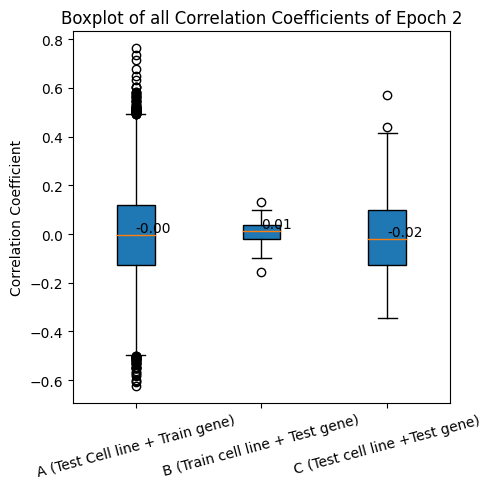

Number of positive values for A: 8532
Number of negative valuesfor A: 9011
Number of positive values for B: 59
Number of negative valuesfor B: 41
Number of positive values for C: 49
Number of negative valuesfor C: 51


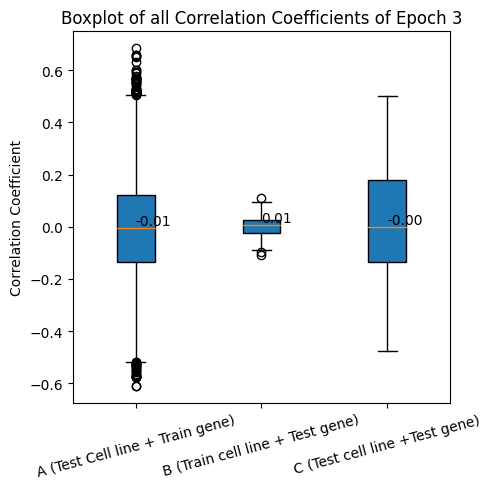

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

for i in range(1, 4):

    file_A = pd.read_csv(f'/mnt/data/macaulay/datas/A_metrics_epoch_{i}.csv')
    file_B = pd.read_csv(f'/mnt/data/macaulay/datas/B_metrics_epoch_{i}.csv')
    file_C = pd.read_csv(f'/mnt/data/macaulay/datas/C_metrics_epoch_{i}.csv')

    data = [file_A["Correlation_Coefficient"], file_B["Correlation_Coefficient"], file_C["Correlation_Coefficient"]]

    positive_count_A = (file_A["Correlation_Coefficient"] > 0).sum()
    negative_count_A= (file_A["Correlation_Coefficient"] < 0).sum()
    positive_count_B = (file_B["Correlation_Coefficient"] > 0).sum()
    negative_count_B= (file_B["Correlation_Coefficient"] < 0).sum()
    positive_count_C = (file_C["Correlation_Coefficient"] > 0).sum()
    negative_count_C = (file_C["Correlation_Coefficient"] < 0).sum()

    print('=====================================================')
    print(f'Number of positive values for A: {positive_count_A}')
    print(f'Number of negative valuesfor A: {negative_count_A}')
    print('=====================================================')
    print(f'Number of positive values for B: {positive_count_B}')
    print(f'Number of negative valuesfor B: {negative_count_B}')
    print('=====================================================')
    print(f'Number of positive values for C: {positive_count_C}')
    print(f'Number of negative valuesfor C: {negative_count_C}')


    plt.figure(figsize=(5, 5))
    plt.boxplot(data, vert=True, patch_artist=True, labels=['A (Test Cell line + Train gene)', 
                                                        'B (Train cell line + Test gene)', 
                                                        'C (Test cell line +Test gene)'])
    plt.title(f'Boxplot of all Correlation Coefficients of Epoch {i}')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation=15)
    plt.tight_layout()
    medians = [np.median(file_A["Correlation_Coefficient"]), np.median(file_B["Correlation_Coefficient"]), np.median(file_C["Correlation_Coefficient"])]
    for i, median in enumerate(medians):
        plt.text(i + 1, median, f"{median:.2f}", verticalalignment='bottom', horizontalalignment='left')


    plt.show()




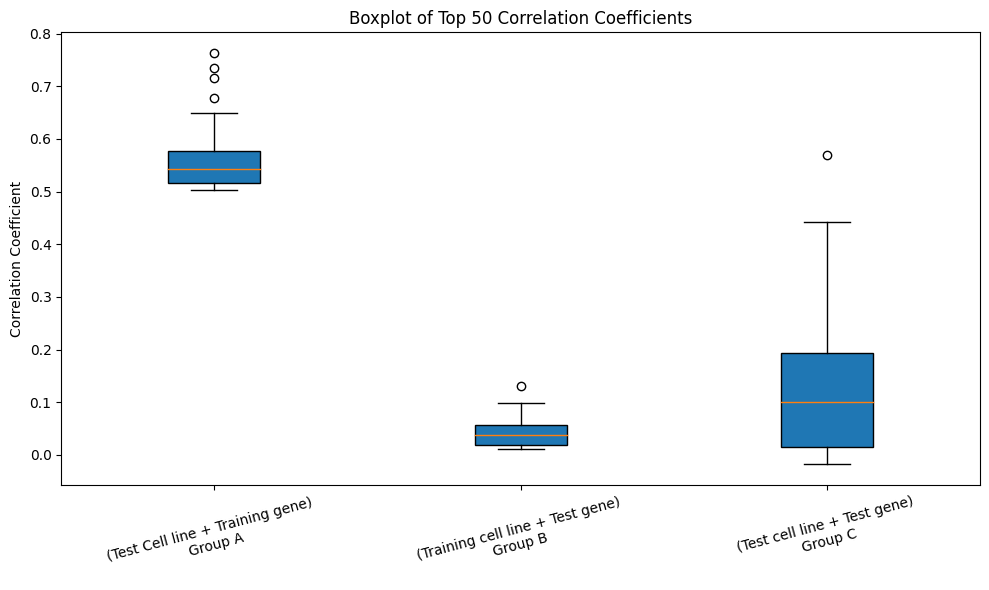

In [3]:
import matplotlib.pyplot as plt


for i in range(2, 3):

    file_A = pd.read_csv(f'/mnt/data/macaulay/datas/A_metrics_epoch_{i}.csv')
    file_B = pd.read_csv(f'/mnt/data/macaulay/datas/B_metrics_epoch_{i}.csv')
    file_C = pd.read_csv(f'/mnt/data/macaulay/datas/C_metrics_epoch_{i}.csv')
    # Extract the top 50 correlated values for each file
    top_50_A = file_A.nlargest(50, 'Correlation_Coefficient')
    top_50_B = file_B.nlargest(50, 'Correlation_Coefficient')
    top_50_C = file_C.nlargest(50, 'Correlation_Coefficient')

    top_50_A["Correlation_Coefficient"].describe()
    # Data for boxplot
    data_top_50 = [top_50_A["Correlation_Coefficient"], top_50_B["Correlation_Coefficient"], top_50_C["Correlation_Coefficient"]]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.boxplot(data_top_50, vert=True, patch_artist=True, labels=['(Test Cell line + Training gene) \nGroup A', 
                                                                '(Training cell line + Test gene)\nGroup B ', 
                                                                '(Test cell line + Test gene)\nGroup C'])
    plt.title('Boxplot of Top 50 Correlation Coefficients')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation=15)
    plt.tight_layout()

    plt.show()


In [4]:
# Load the gene metadata file
#gene_metadata1 = pd.read_csv('datas/processed_gene_embeddings.csv')

gene_metadata1 = pd.read_csv('/mnt/data/macaulay/datas/processed_gene_embeddings.csv')
gene_metadata = gene_metadata1[['Gene']]

gene_metadata = gene_metadata.iloc[100:]
gene_metadata.reset_index(inplace=True)
gene_metadata.drop('index', axis=1, inplace=True)
gene_metadata


,Gene
0,ZFX
1,LAMP2
2,ITGA2B
3,ASB4
4,GDE1
...,...
17538,TMEM247
17539,EEF1AKMT4
17540,TBCE
17541,CCDC39


In [35]:
gene_metadata

,Gene
0,ZFX
1,LAMP2
2,ITGA2B
3,ASB4
4,GDE1
...,...
17538,TMEM247
17539,EEF1AKMT4
17540,TBCE
17541,CCDC39


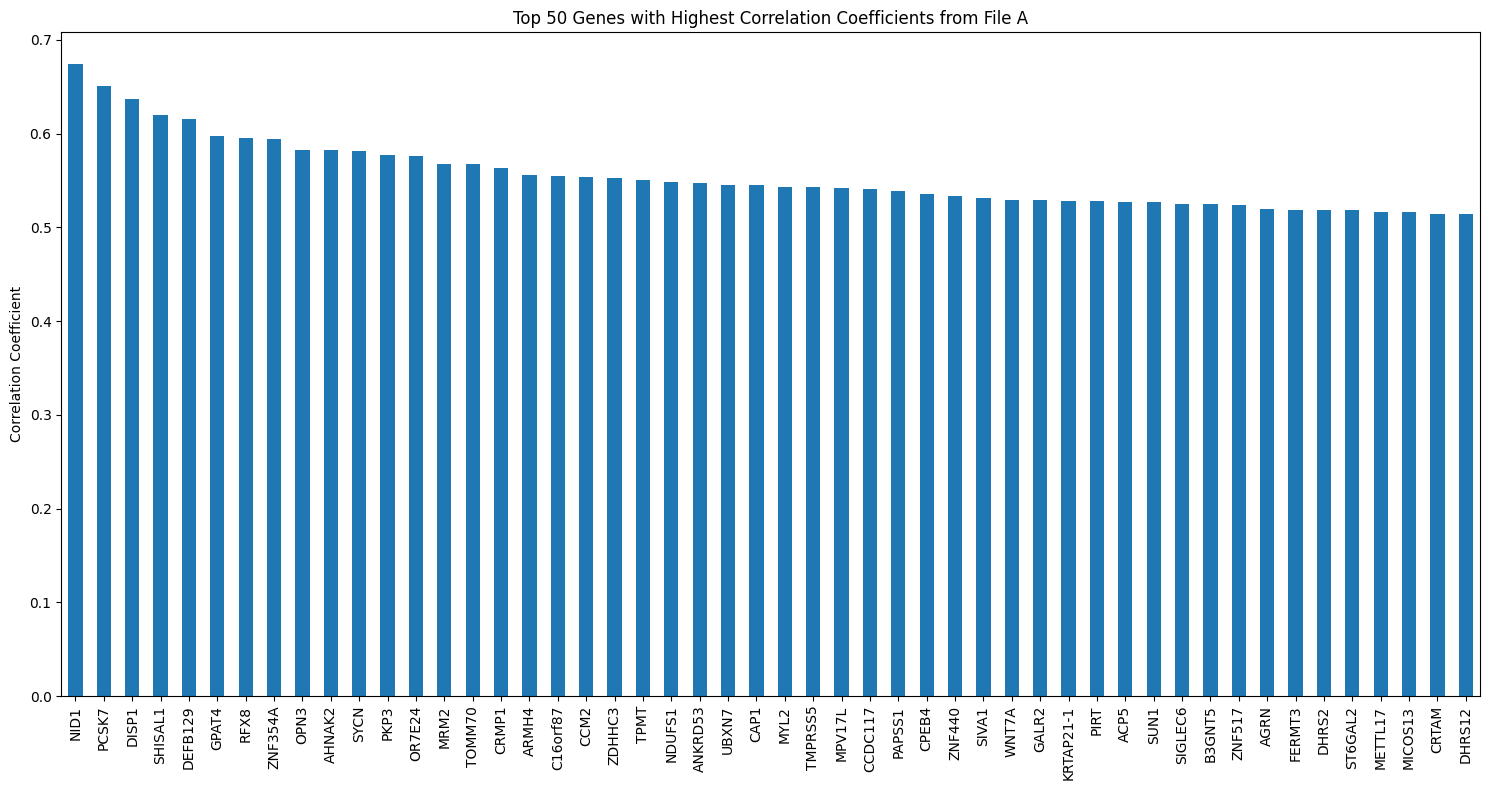

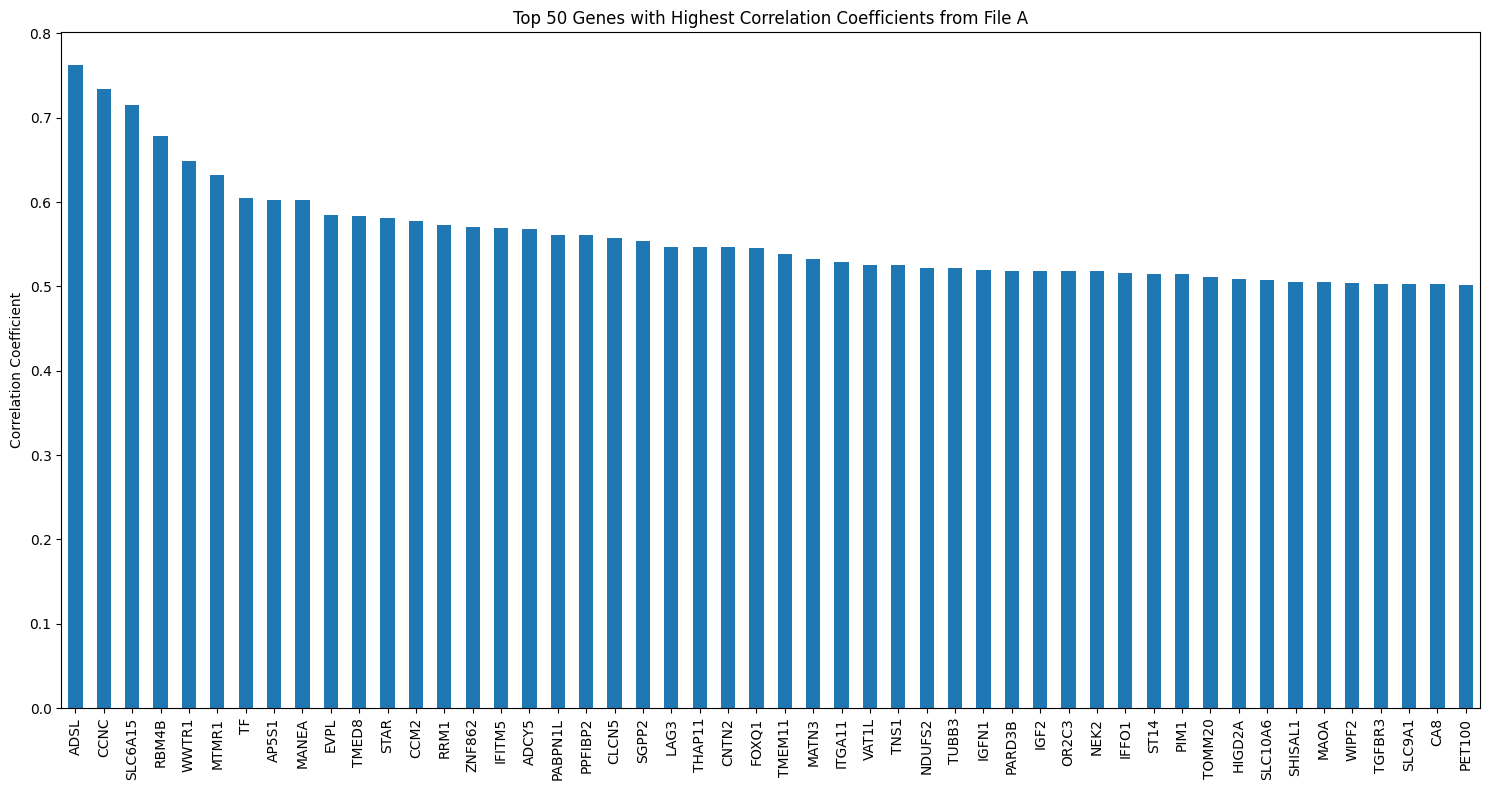

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/macaulay/datas/A_metrics_epoch_3.csv'

In [5]:


for i in range(1, 21):

    file_A = pd.read_csv(f'/mnt/data/macaulay/datas/A_metrics_epoch_{i}.csv')
    file_A = pd.concat([file_A, gene_metadata], axis=1)
    top_50_genes_A = file_A.nlargest(50, 'Correlation_Coefficient', 'all')

    # Plotting
    plt.figure(figsize=(15, 8))
    top_50_genes_A["Correlation_Coefficient"].plot(kind='bar')
    plt.xticks(range(50), top_50_genes_A["Gene"], rotation=90)
    plt.ylabel('Correlation Coefficient')
    plt.title('Top 50 Genes with Highest Correlation Coefficients from File A')
    plt.tight_layout()

    plt.show()


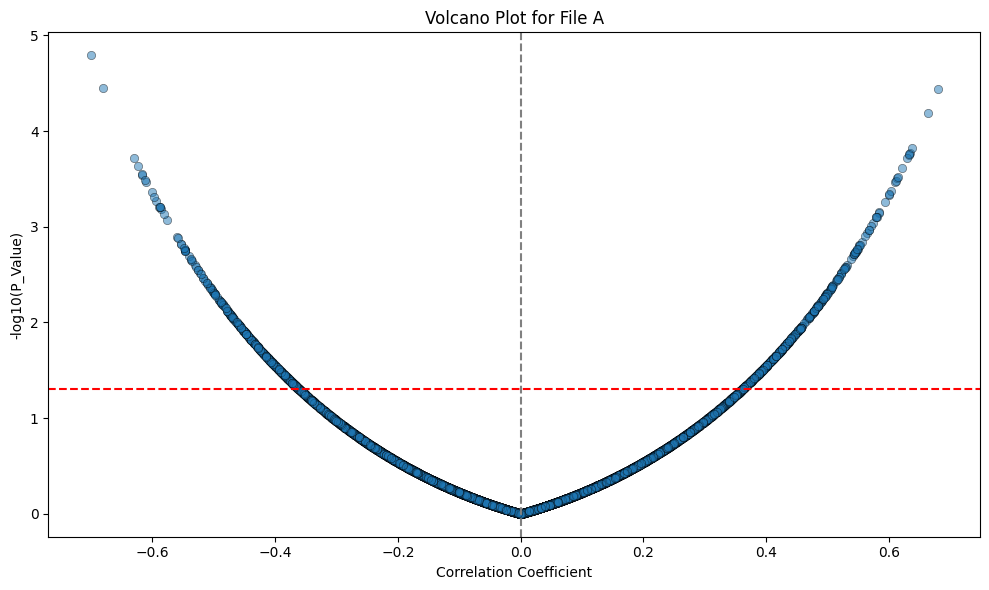

In [11]:
import numpy as np

# Calculate -log10 of the P_Value
file_A["-log10_P_Value"] = -np.log10(file_A["P_Value"])

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(file_A["Correlation_Coefficient"], file_A["-log10_P_Value"], alpha=0.5, edgecolors="k", linewidth=0.5)
plt.title('Volcano Plot for File A')
plt.xlabel('Correlation Coefficient')
plt.ylabel('-log10(P_Value)')
plt.axhline(y=-np.log10(0.05), color='r', linestyle='--')  # Significance threshold
plt.axvline(x=0, color='gray', linestyle='--')
plt.tight_layout()

plt.show()


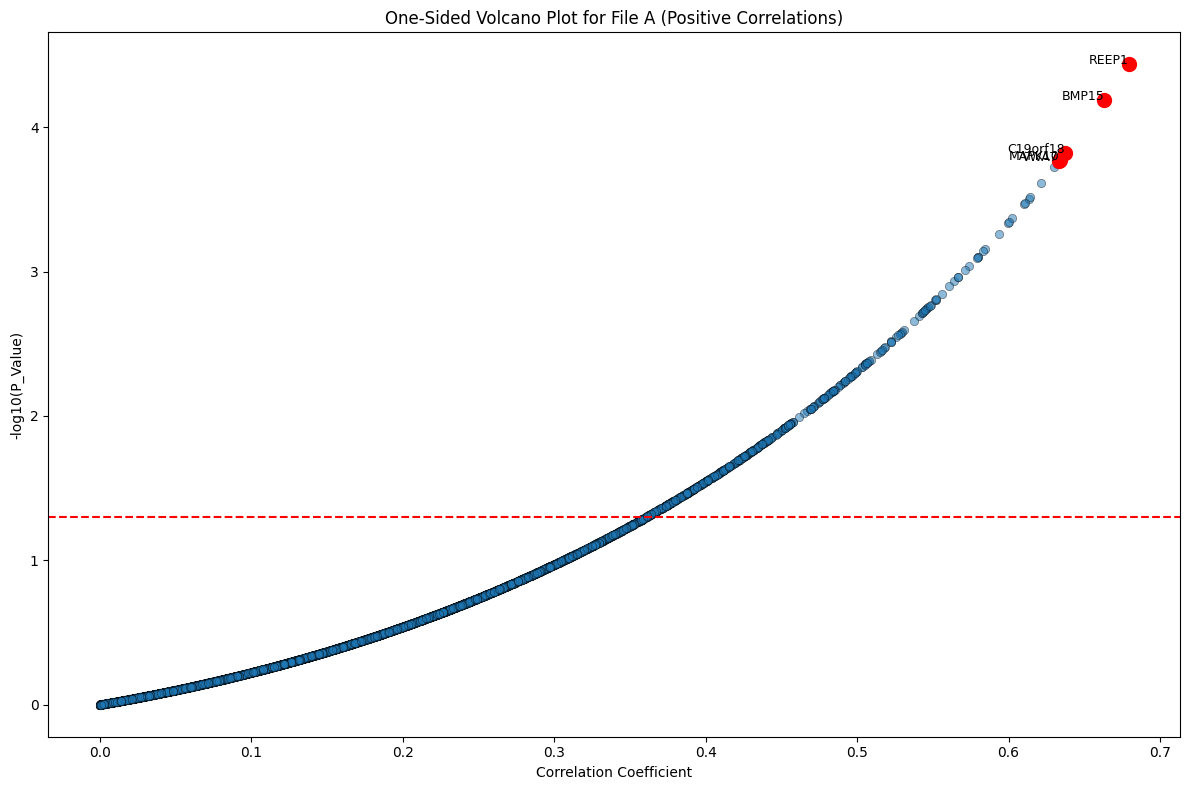

In [12]:
# Filter for positive correlation coefficients
one_sided_data = file_A[file_A["Correlation_Coefficient"] > 0]

# Sort by significance and select top 5
top_5_genes = one_sided_data.nsmallest(5, 'P_Value')

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(one_sided_data["Correlation_Coefficient"], one_sided_data["-log10_P_Value"], alpha=0.5, edgecolors="k", linewidth=0.5)
plt.scatter(top_5_genes["Correlation_Coefficient"], top_5_genes["-log10_P_Value"], color='red', s=100)
plt.title('One-Sided Volcano Plot for File A (Positive Correlations)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('-log10(P_Value)')
plt.axhline(y=-np.log10(0.05), color='r', linestyle='--')  

# Annotate the top 5 genes
for _, row in top_5_genes.iterrows():
    plt.annotate(row["Gene"], (row["Correlation_Coefficient"], row["-log10_P_Value"]), fontsize=9, ha='right')

plt.tight_layout()
plt.show()


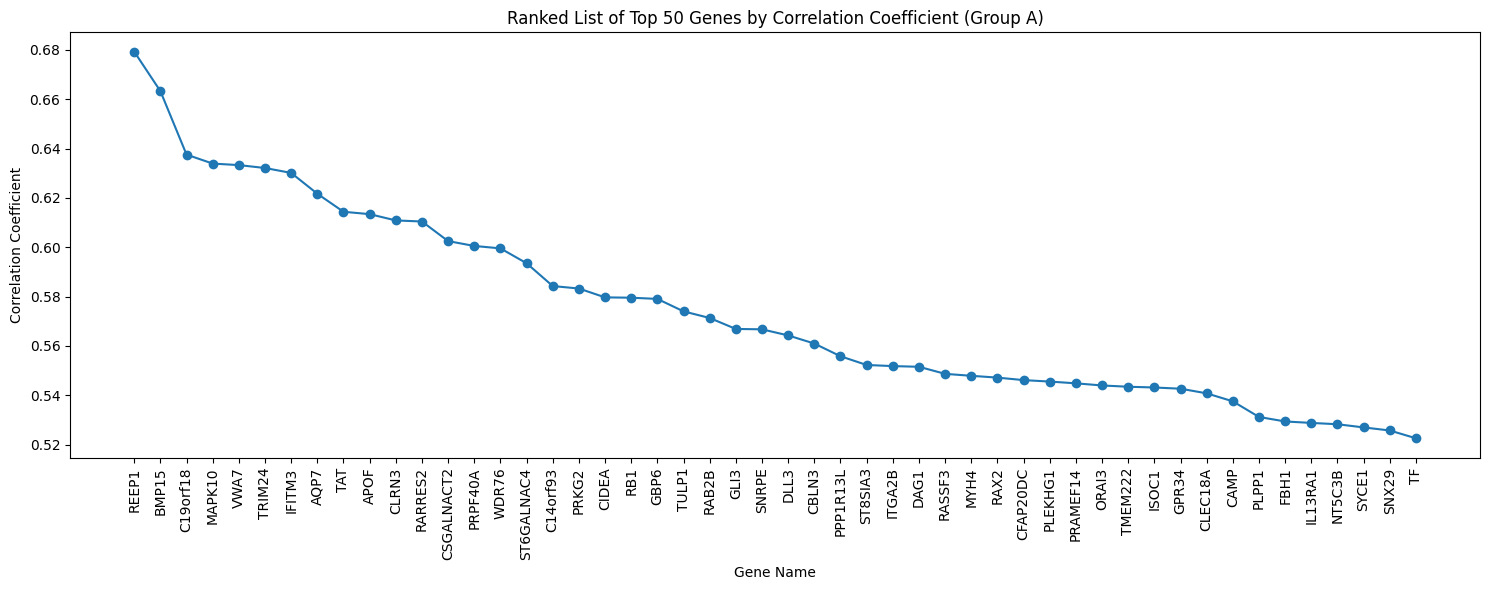

In [13]:
# Rank genes by absolute correlation coefficient and select top 100
top_100_genes_ranked = file_A.nlargest(50, 'Correlation_Coefficient', 'all')

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(top_100_genes_ranked["Gene"], top_100_genes_ranked["Correlation_Coefficient"], marker='o', linestyle='-')
plt.xticks(rotation=90)
plt.xlabel('Gene Name')
plt.ylabel('Correlation Coefficient')
plt.title('Ranked List of Top 50 Genes by Correlation Coefficient (Group A)')
plt.tight_layout()

plt.show()


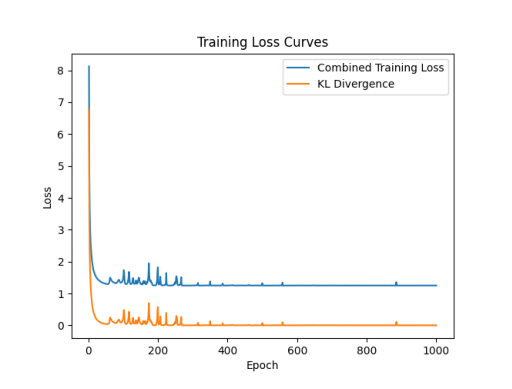

In [14]:
import matplotlib.pyplot as plt
from PIL import Image

# Load the image using PIL (Python Imaging Library)
image_path = '/mnt/data/macaulay/plot_images/vae_loss_curve.png'
img = Image.open(image_path)

# Display the image using Matplotlib
plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()


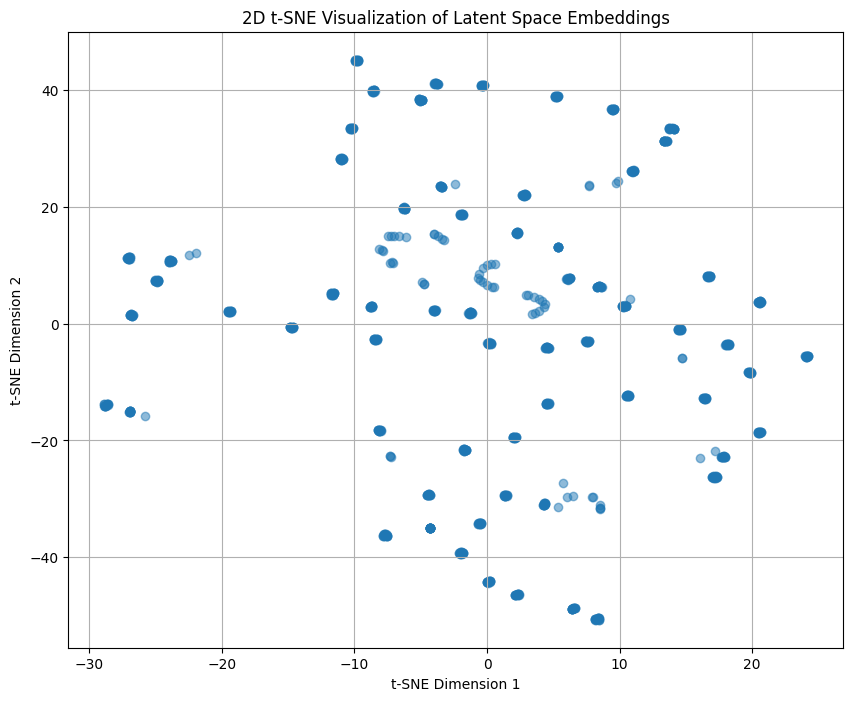

In [16]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the embeddings
embeddings_df = pd.read_csv('/mnt/data/macaulay/datas/OmicExpression_embeddings.csv')
embeddings_df = embeddings_df.iloc[:, 1:]
embeddings_array = embeddings_df.values

# Use t-SNE to reduce the embeddings to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(embeddings_array)

# Plot the t-SNE reduced embeddings
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], alpha=0.5)
plt.title('2D t-SNE Visualization of Latent Space Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()

In [13]:
! cd datas/ && rm *

rm: cannot remove '*': No such file or directory


In [16]:



import torch
import torch.nn.functional as F
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import os
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
from functions import FullConnectedBlock, NeuralNetwork
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pd.options.mode.chained_assignment = None
import numpy as np
import json
import sys



def initialize_environment(data1_path, data2_path, df_Y_path, learning_rate):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print('Device:', device)
    print(f'Number of available GPUs: {torch.cuda.device_count()}')

    data1 = pd.read_csv(data1_path)
    data2 = pd.read_csv(data2_path)
    df_Y = pd.read_csv(df_Y_path)
    print('Training data loaded successfully')

    loss_fn = nn.MSELoss()
    input_dim = data1.shape[1] + data2.shape[1] - 1
    model = NeuralNetwork(input_dim)
    model = model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    if torch.cuda.device_count() >= 4:
        print("Using 4 GPUs!")
        model = nn.DataParallel(model, device_ids=list(range(4)))
    print('Model initialized successfully')
    
    
    return device, data1, data2, df_Y, model, optimizer, loss_fn

def cartesian_product(data1, data2):
    data1['key'] = 1
    data2['key'] = 1
    combined_data = pd.merge(data1, data2, on='key').drop(columns=['key'])
    # print(len(combined_data))
    
    return combined_data

def cartesian_product_generator(data1, data2, df_Y, batch_size1):
    for i in range(0, len(data1), batch_size1):
        start_idx = i * len(data2)
        end_idx = (i + batch_size1) * len(data2)
        batch_data1 = data1.iloc[i:i + batch_size1]
        
        batch_X = cartesian_product(batch_data1, data2)
        batch_Y = df_Y.iloc[start_idx:end_idx]
        yield batch_X, batch_Y

def load_model(model, epoch, model_save_path):
    model_path = os.path.join(model_save_path, f'crispr_fc1_model_state_epoch_{epoch-1}.pth')

    if os.path.exists(model_path):
        model.load_state_dict(torch.load(model_path))
        print(f'Model {epoch - 1} loaded successfully for epoch {epoch}')
    else:
        print('No saved model found. Training from scratch.')
    return model


# Main Training Loop
def main_training_loop(data1_path, data2_path, df_Y_path, 
                               data1_test_path_A, data2_test_path_A, df_Y_test_path_A, 
                               data1_test_path_B, data2_test_path_B, df_Y_test_path_B,
                               data1_test_path_C, data2_test_path_C, df_Y_test_path_C,
                               batch_size1, learning_rate, num_epochs, model_save_path, test_batch_size=128):
    

    device, data1, data2, df_Y, model, optimizer, loss_fn = initialize_environment(data1_path, data2_path, df_Y_path, learning_rate)
    # data1 = data1.iloc[:300]

    # display(data1)
    # display(data2)
    # display(df_Y)



    # import time

    # start_epoch = 1
    # end_epoch = 20
    from sklearn.model_selection import train_test_split
    from scipy.stats import pearsonr
    # print(len(data1))
    saved_models = os.listdir(model_save_path)
    epochs = [int(file.split('_')[-1].split('.')[0]) for file in saved_models if 'crispr_fc1_model_state_epoch_' in file]
    last_epoch = max(epochs) if epochs else 0
    start_epoch = last_epoch + 1
    end_epoch = start_epoch + num_epochs


    gene_predictions = {}
    gene_actuals = {}



    for epoch in range(start_epoch, end_epoch):
        max_index = (len(data1) // batch_size1) * batch_size1
        # print(max_index)
        # # time.sleep(10000)
        max_index = 50

        epoch_train_correlations = []
        epoch_train_losses = []
        epoch_test_correlations = []
        epoch_test_losses = []
        test_counter = 0
        for j in range(0, max_index, batch_size1):
            batched_data1 = data1.iloc[j:j+batch_size1]
            model.train()
            if j == 0:
                model = load_model(model, epoch, model_save_path)

            for batch_X, batch_Y in cartesian_product_generator(batched_data1, data2, df_Y, batch_size1):
                
                # Concatenate X and Y DataFrames along the columns axis
                combined = pd.concat([batch_X.reset_index(drop=True), batch_Y.reset_index(drop=True)], axis=1)            

                # Shuffle data
                combined = combined.sample(frac=1, random_state=42).reset_index(drop=True)
                
            

                # Split shuffled data back into X and Y
                shuffled_X = combined.iloc[:, :-batch_Y.shape[1]]
                shuffled_Y = combined.iloc[:, -batch_Y.shape[1]:]

                # Then use train_test_split to split the shuffled data into training and test sets
                X_train, X_test, Y_train, Y_test = train_test_split(shuffled_X, shuffled_Y, test_size=0.05, shuffle=False)
                # X_test_indices = X_test.index.tolist()  # Get indices of X_test
                # Y_test_indices = Y_test.index.tolist() 


                # if epoch == 1:

                #     sys.exit('stop')
                #     file_name_X = f'X_test_{test_counter}.csv'
                #     file_path_X = os.path.join(model_save_path, file_name_X)
                #     file_name_Y = f'Y_test_{test_counter}.csv'
                #     file_path_Y = os.path.join(model_save_path, file_name_Y)
                #     X_test.to_csv(file_path_X, index=False)
                #     Y_test.to_csv(file_path_Y, index=False)
                #     X_train = X_train.drop(columns=["Gene"])
                    
                #     test_counter += 1
                 
                # else:
                #     sys.exit('stop')
                #     file_name_X = f'X_test_{test_counter}.csv'
                #     file_path_X = os.path.join(model_save_path, file_name_X)
                #     X_test = pd.read_csv(file_path_X)
                #     file_name_Y = f'Y_test_{test_counter}.csv'
                #     file_path_Y = os.path.join(model_save_path, file_name_Y)
                #     Y_test = pd.read_csv(file_path_Y)
                #     X_train = X_train.drop(columns=["Gene"])
                    
                #     test_counter += 1


                # import sys
                # sys.exit('stop')
                # Convert training data to tensor and create dataloader
                X_train = X_train.drop(columns=["Gene"])
                X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
                Y_train_tensor = torch.tensor(Y_train.values.reshape(-1, 1), dtype=torch.float32).to(device)
                train_data = TensorDataset(X_train_tensor, Y_train_tensor)
                train_dataloader = DataLoader(train_data, batch_size=128, shuffle=True)
                
                train_loss = 0.0
                train_correlations_b = []
                for inputs, targets in train_dataloader:
                    inputs, targets = inputs.to(device), targets.to(device)
                    optimizer.zero_grad()
                    outputs = model(inputs)
                    loss = loss_fn(outputs, targets)
                    loss.backward()
                    optimizer.step()
                    train_loss += loss.item()
                    train_predictions_np = outputs.detach().cpu().numpy()
                    Y_train_np = targets.cpu().numpy()
                    train_correlation, _ = pearsonr(train_predictions_np.squeeze(), Y_train_np.squeeze())
                    train_correlations_b.append(train_correlation)
                epoch_train_losses.append(train_loss / len(train_dataloader))
                epoch_train_correlations.append(np.mean(train_correlations_b))



                # Evaluate on test data
                model.eval()
                with torch.no_grad():
                    # Convert test data to tensor and evaluate
                    X_test_tensor = torch.tensor(X_test.drop(columns=["Gene"]).values, dtype=torch.float32).to(device)
                    Y_test_tensor = torch.tensor(Y_test.values.reshape(-1, 1), dtype=torch.float32).to(device)
                    predictions = model(X_test_tensor)
                    test_loss = loss_fn(predictions, Y_test_tensor)
                    
                    # Convert tensors to numpy arrays for correlation computation
                    predictions_np = predictions.cpu().numpy()
                    Y_test_np = Y_test_tensor.cpu().numpy()
                    
                    correlation, _ = pearsonr(predictions_np.squeeze(), Y_test_np.squeeze())
                    epoch_test_correlations.append(correlation)
                    epoch_test_losses.append(test_loss.item())

                    # Aggregate predictions and actual values for each gene
                    for gene in X_test['Gene'].unique():
                        gene_mask = (X_test['Gene'] == gene)
                        X_test_gene = X_test[gene_mask]
                        Y_test_gene = Y_test[gene_mask]

                        X_test_tensor = torch.tensor(X_test_gene.drop(columns=["Gene"]).values, dtype=torch.float32).to(device)
                        Y_test_tensor = torch.tensor(Y_test_gene.values.reshape(-1, 1), dtype=torch.float32).to(device)

                        predictions_gene = model(X_test_tensor)

                        predictions_gene_np = predictions_gene.cpu().numpy().squeeze()
                        Y_test_gene_np = Y_test_tensor.cpu().numpy().squeeze()
                        gene_predictions[gene] = gene_predictions.get(gene, []) + predictions_gene_np.tolist()
                        gene_actuals[gene] = gene_actuals.get(gene, []) + Y_test_gene_np.tolist()

                # Calculate Pearson correlation for each gene
                gene_correlations = {}
                for gene in gene_predictions.keys():
                    correlation, _ = pearsonr(gene_predictions[gene], gene_actuals[gene])
                    gene_correlations[gene] = correlation

        # Print or save gene correlations
        for gene, corr in gene_correlations.items():
            print(f"Gene {gene}: Pearson Correlation = {corr:.4f}")

            with open(os.path.join(model_save_path, f'gene_correlations.txt'), 'a') as f:
                if epoch == 1:
                    f.write('Epoch,gene,correlation\n')
                f.write(f'Epoch{epoch},{gene},{corr:.4f}\n')
                   

        # Save model state and metrics
        torch.save(model.state_dict(), os.path.join(model_save_path, f'crispr_fc1_model_state_epoch_{epoch}.pth'))
        with open(os.path.join(model_save_path, f'metrics.txt'), 'a') as f:
            if epoch == 1:
                f.write('epoch,train_loss,train_correlation,test_loss,test_correlation\n')
            f.write(f'{epoch},{np.mean(epoch_train_losses):.4f},{np.mean(epoch_train_correlations):.4f},{np.mean(epoch_test_losses):.4f},{np.mean(epoch_test_correlations):.4f}\n')
        print(f'Epoch {epoch} completed')




main_training_loop(data1_path="/mnt/data/macaulay/datas/training_gene_embeddings.csv",
                   data2_path="/mnt/data/macaulay/datas/training_omicExpression_Embeddings.csv",
                   df_Y_path='/mnt/data/macaulay/datas/training_crispr.csv',
                   data1_test_path_A="/mnt/data/macaulay/datas/training_gene_embeddings.csv",
                   data2_test_path_A="/mnt/data/macaulay/datas/test_omicExpression_Embeddings.csv",
                   df_Y_test_path_A='/mnt/data/macaulay/datas/A_test_gene__Y_crispr.csv',
                   data1_test_path_B="/mnt/data/macaulay/datas/test_gene_embeddings.csv",
                   data2_test_path_B="/mnt/data/macaulay/datas/training_omicExpression_Embeddings.csv",
                   df_Y_test_path_B='/mnt/data/macaulay/datas/B_test_gene__Y_crispr.csv',
                   data1_test_path_C="/mnt/data/macaulay/datas/test_gene_embeddings.csv",
                   data2_test_path_C="/mnt/data/macaulay/datas/test_omicExpression_Embeddings.csv",
                   df_Y_test_path_C='/mnt/data/macaulay/datas/C_test_gene__Y_crispr.csv',
                   batch_size1=1,learning_rate=0.001,num_epochs=6,
                   model_save_path='/home/macaulay/macaulay/GenePedia/datas/',test_batch_size=128)

                #    model_save_path='/mnt/data/macaulay/datas/model_datas/',test_batch_size=128)

# model_save_path='/home/macaulay/macaulay/GenePedia/datas/',test_batch_size=128)

Device: cuda
Number of available GPUs: 1
Training data loaded successfully
Model initialized successfully
No saved model found. Training from scratch.


RuntimeError: CUDA error: no kernel image is available for execution on the device
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

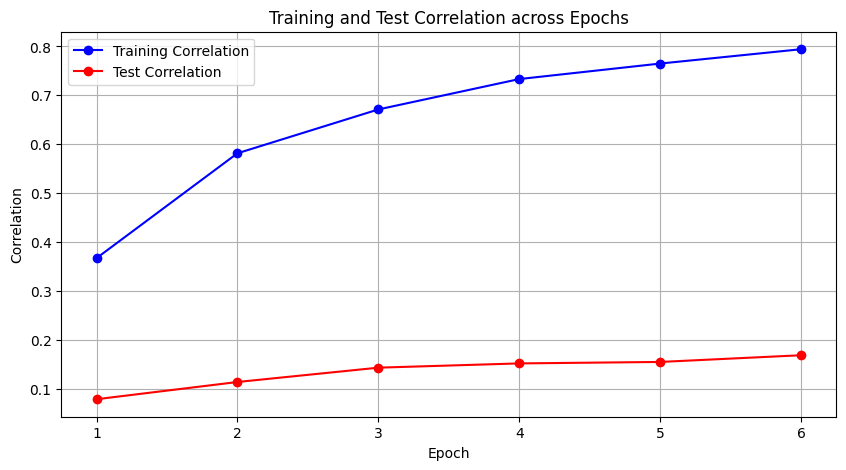

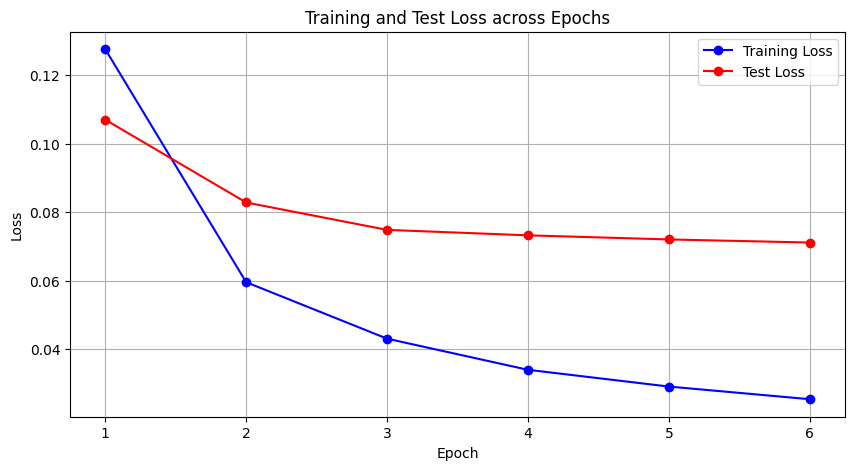

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# Data
# data = {
#     "epoch": list(range(1, 21)),
#     "train_loss": [0.1832, 0.1738, 0.1731, 0.1724, 0.1719, 0.1706, 0.1699, 0.1695, 0.1688, 0.1681, 0.1680, 0.1672, 0.1671, 0.1666, 0.1663, 0.1661, 0.1660, 0.1660, 0.1648, 0.1648],
#     "train_correlation": [0.1361, 0.2393, 0.2447, 0.2514, 0.2562, 0.2652, 0.2714, 0.2743, 0.2804, 0.2851, 0.2856, 0.2925, 0.2923, 0.2971, 0.3002, 0.3000, 0.3012, 0.3024, 0.3104, 0.3100],
#     "test_loss": [0.1755, 0.1615, 0.1602, 0.1573, 0.1564, 0.1588, 0.1550, 0.1534, 0.1526, 0.1527, 0.1512, 0.1486, 0.1492, 0.1561, 0.1465, 0.1567, 0.1460, 0.1458, 0.1429, 0.1478],
#     "test_correlation": [0.2378, 0.3670, 0.3815, 0.3972, 0.3983, 0.4075, 0.4208, 0.4294, 0.4339, 0.4373, 0.4453, 0.4560, 0.4566, 0.4488, 0.4673, 0.4587, 0.4700, 0.4675, 0.4884, 0.4769]
# }

data = pd.read_csv('datas/metrics.txt')
# train_correlation = df['train_correlation'].to_list()
# test_correlation = df['test_correlation'].to_list()
# train_loss = df['train_loss'].to_list()
# test_loss = df['test_loss'].to_list()
# epoch = df['epoch'].to_list()

plt.figure(figsize=(10, 5))
plt.plot(data["epoch"], data["train_correlation"], label="Training Correlation", color="blue", marker="o")
plt.plot(data["epoch"], data["test_correlation"], label="Test Correlation", color="red", marker="o")
plt.title("Training and Test Correlation across Epochs")
plt.xlabel("Epoch")
plt.ylabel("Correlation")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(data["epoch"], data["train_loss"], label="Training Loss", color="blue", marker="o")
plt.plot(data["epoch"], data["test_loss"], label="Test Loss", color="red", marker="o")
plt.title("Training and Test Loss across Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()



In [26]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('datas/gene_correlations.txt')
df





,Epoch,gene,correlation
0,Epoch1,ZFX,-0.1923
1,Epoch,gene,correlation
2,Epoch1,LAMP2,-0.1242
3,Epoch,gene,correlation
4,Epoch1,ITGA2B,-0.0971
...,...,...,...
9994,Epoch19,C12orf4,0.2897
9995,Epoch19,SCML1,0.2884
9996,Epoch19,ARHGAP6,0.2584
9997,Epoch19,FAM184B,0.2542


In [27]:
import pandas as pd

def read_dataset_with_repeated_headers(file_path):
    data = []
    header = "Epoch,gene,correlation"  # Define the header
    with open(file_path, 'r') as file:
        for line in file:
            if line.strip() != header:  # Skip the line if it's a header
                values = line.strip().split(',')  # Assuming comma-separated values
                if len(values) == 3:  # Ensure the line has the correct number of elements
                    data.append(values)

    # Create a DataFrame from the aggregated data
    df = pd.DataFrame(data, columns=header.split(','))
    #df['correlation'] = pd.to_numeric(df['correlation'])  # Convert gene_correlation to numeric
    return df

# Replace 'your_dataset_file.txt' with the path to your dataset file
df = read_dataset_with_repeated_headers('datas/gene_correlations.txt')

# Now df is a DataFrame containing your data without the repeated headers
df


,Epoch,gene,correlation
0,Epoch1,ZFX,-0.1923
1,Epoch1,LAMP2,-0.1242
2,Epoch1,ITGA2B,-0.0971
3,Epoch1,ASB4,-0.0384
4,Epoch1,GDE1,0.1457
...,...,...,...
9495,Epoch19,C12orf4,0.2897
9496,Epoch19,SCML1,0.2884
9497,Epoch19,ARHGAP6,0.2584
9498,Epoch19,FAM184B,0.2542


In [28]:
df['correlation'] = pd.to_numeric(df['correlation'], errors='coerce')
df = df.dropna(subset=['correlation'])
df

,Epoch,gene,correlation
0,Epoch1,ZFX,-0.1923
1,Epoch1,LAMP2,-0.1242
2,Epoch1,ITGA2B,-0.0971
3,Epoch1,ASB4,-0.0384
4,Epoch1,GDE1,0.1457
...,...,...,...
9495,Epoch19,C12orf4,0.2897
9496,Epoch19,SCML1,0.2884
9497,Epoch19,ARHGAP6,0.2584
9498,Epoch19,FAM184B,0.2542


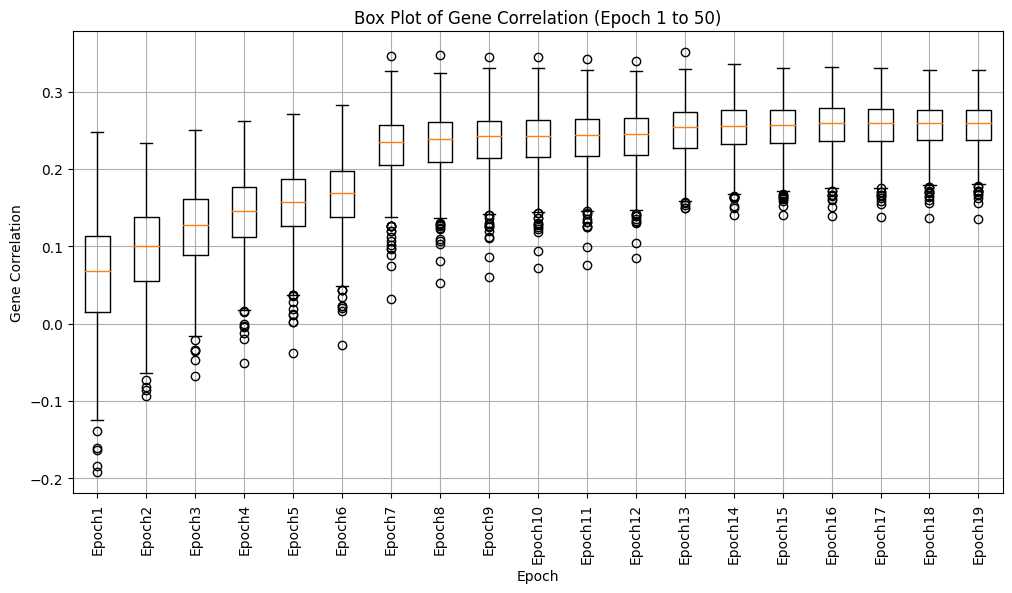

In [30]:
from matplotlib import pyplot as plt
# Filtering the DataFrame to include only epochs 1 to 9
filtered_df = df[df['Epoch'].isin([f'Epoch{i}' for i in range(1, 50)])]

# Creating a box plot for epochs 1 to 9
plt.figure(figsize=(12, 6))
plt.boxplot([filtered_df[filtered_df['Epoch'] == epoch]['correlation'] for epoch in filtered_df['Epoch'].unique()],
            labels=filtered_df['Epoch'].unique())
plt.title('Box Plot of Gene Correlation (Epoch 1 to 50)')
plt.xlabel('Epoch')
plt.ylabel('Gene Correlation')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


In [22]:
df_sorted = df.sort_values(by=['Epoch', 'correlation'], ascending=[True, False])
df_sorted

,Epoch,gene,correlation
142,Epoch1,SEMA3G,0.2479
207,Epoch1,MAN2B2,0.2240
432,Epoch1,SOX30,0.2170
381,Epoch1,TMSB10,0.2113
400,Epoch1,OTC,0.2061
...,...,...,...
4161,Epoch9,MRC2,0.1199
4430,Epoch9,C6,0.1125
4425,Epoch9,CDH1,0.1102
4361,Epoch9,GRN,0.0865


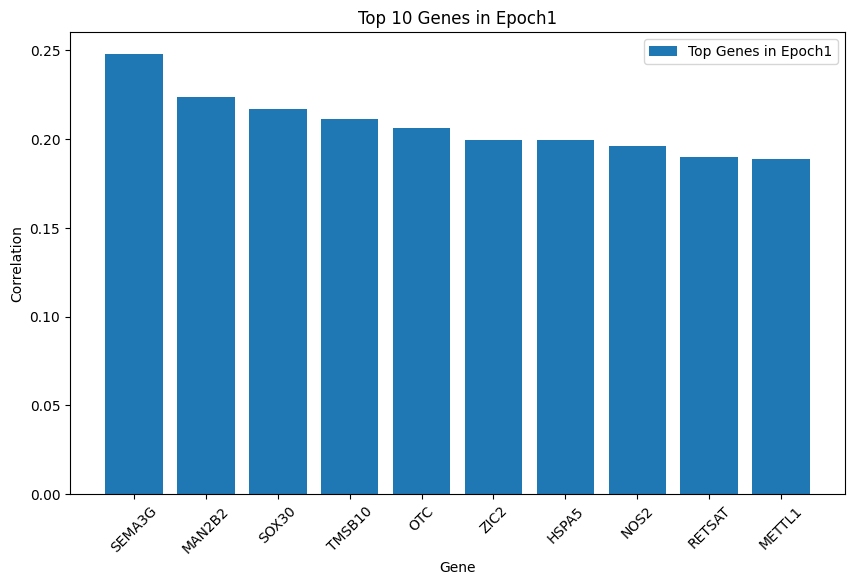

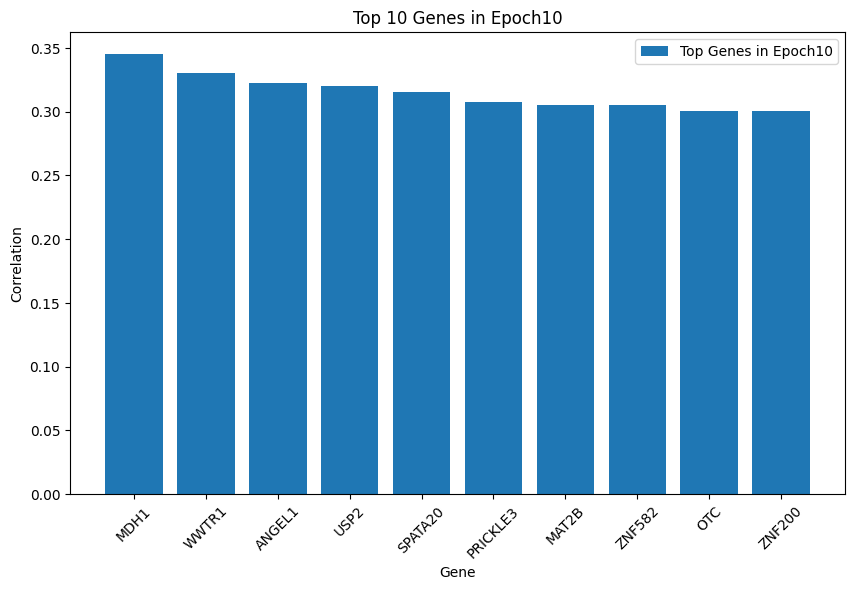

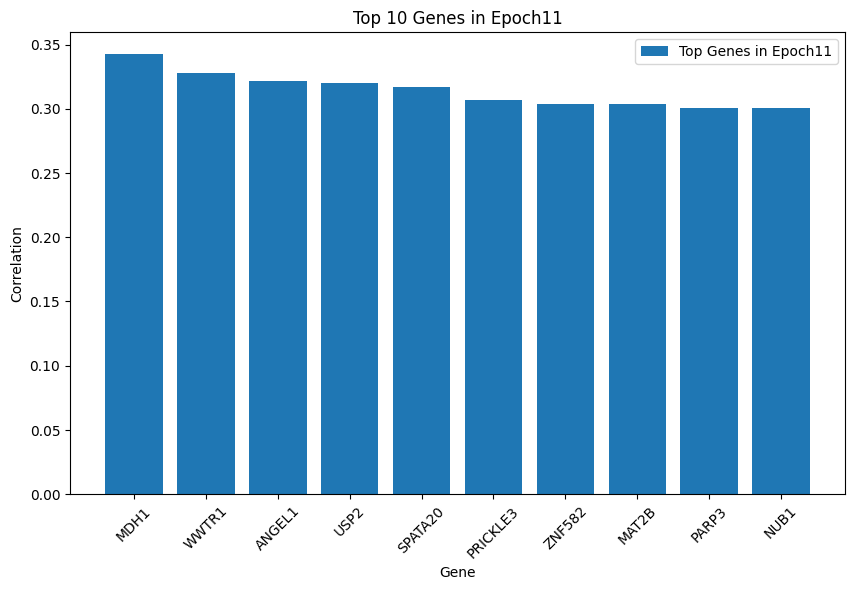

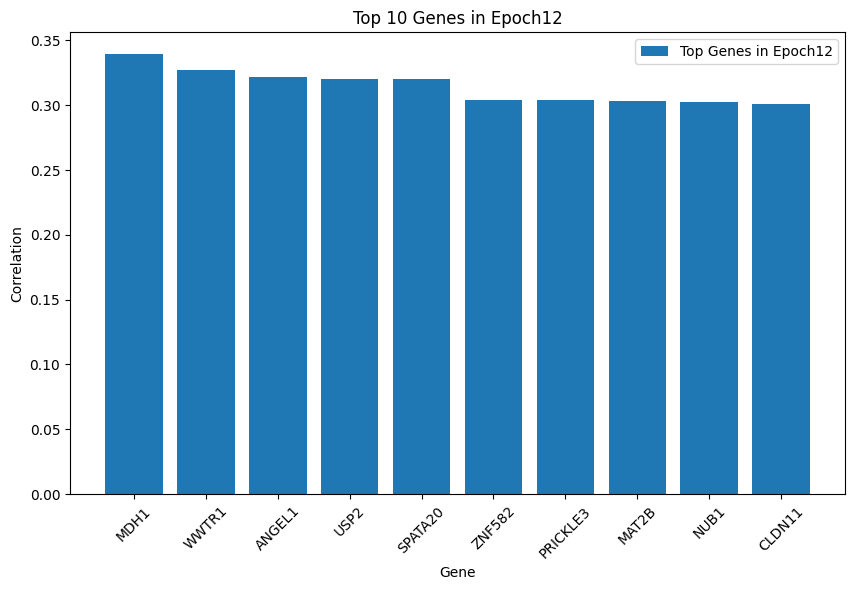

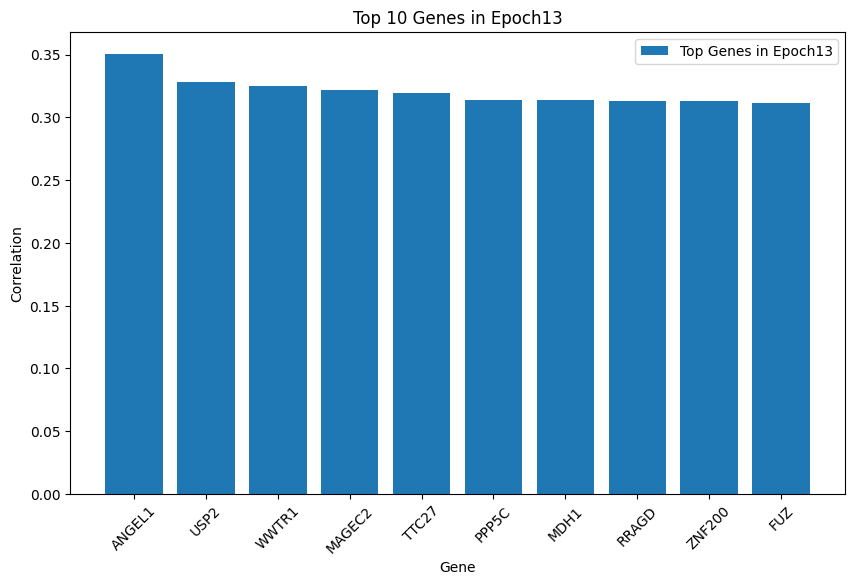

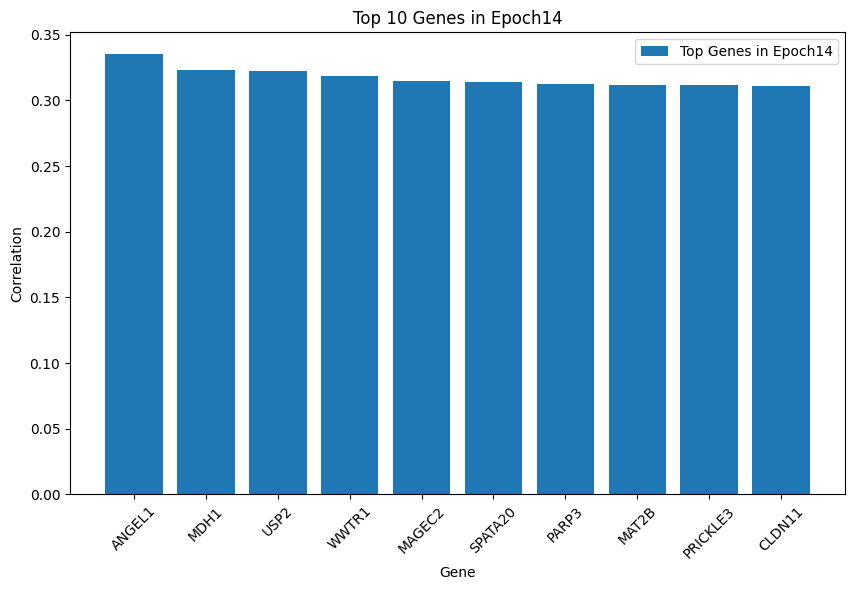

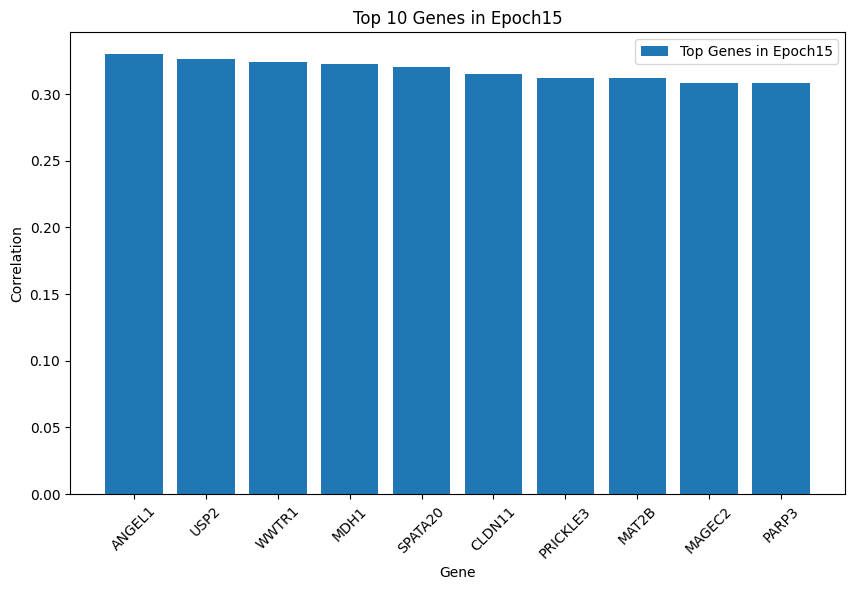

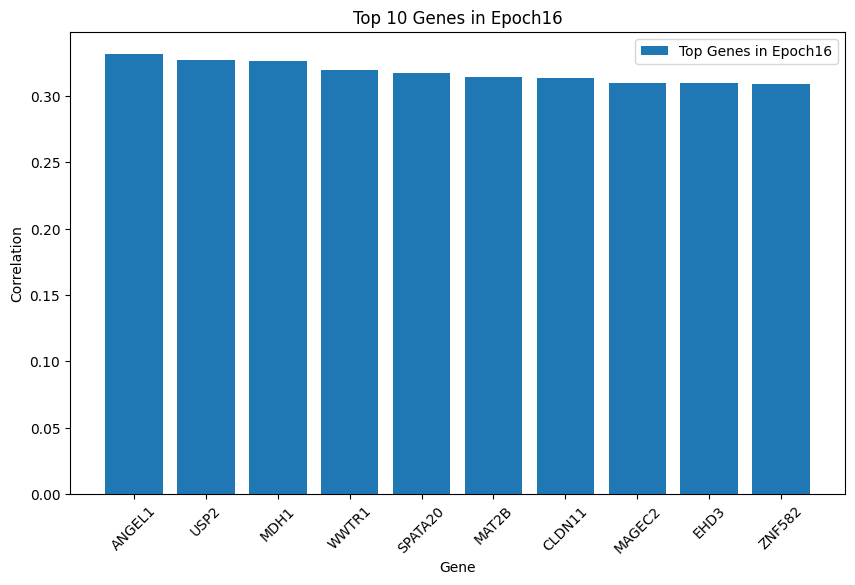

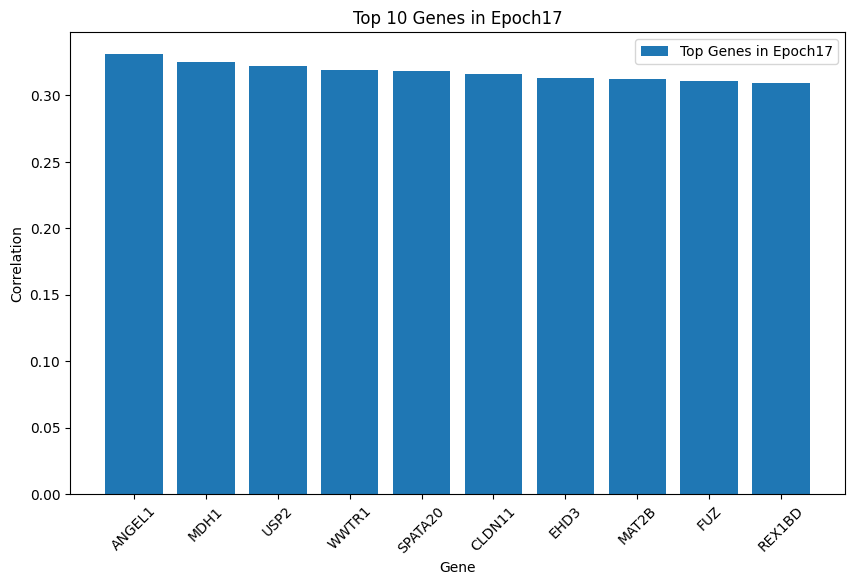

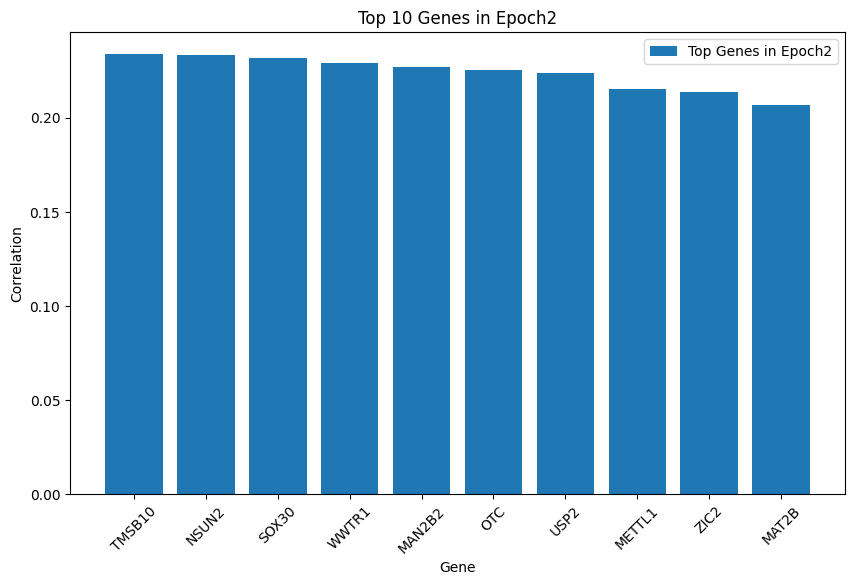

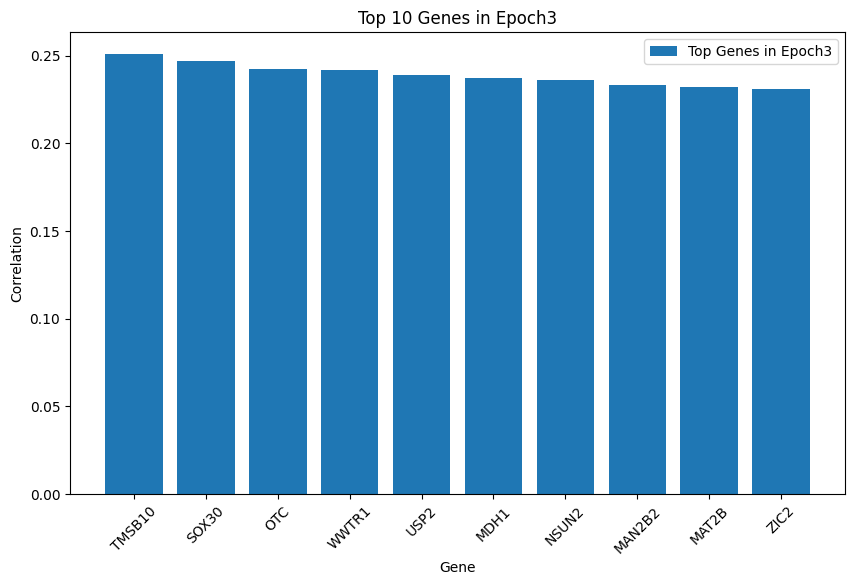

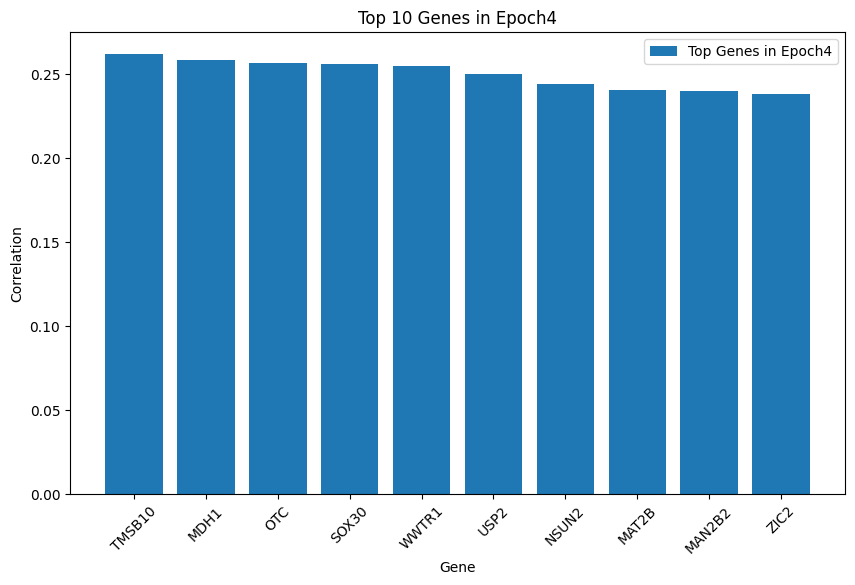

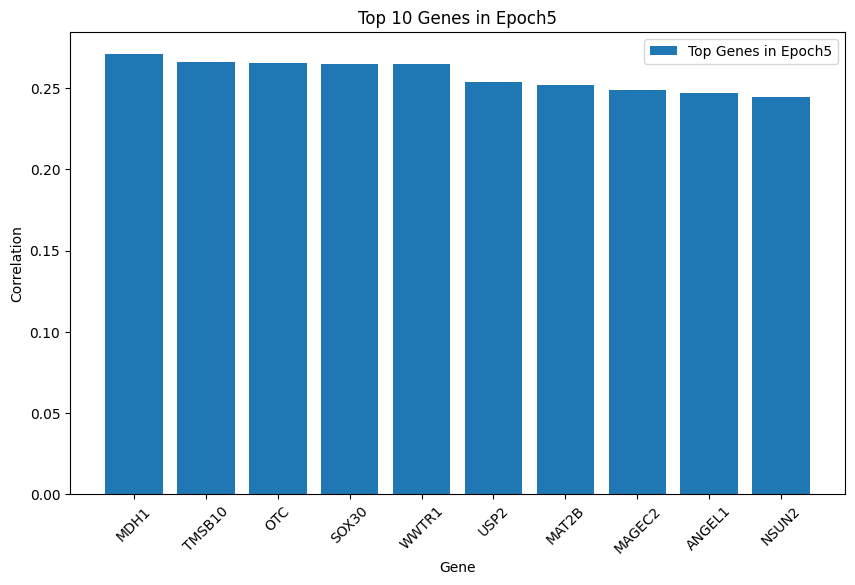

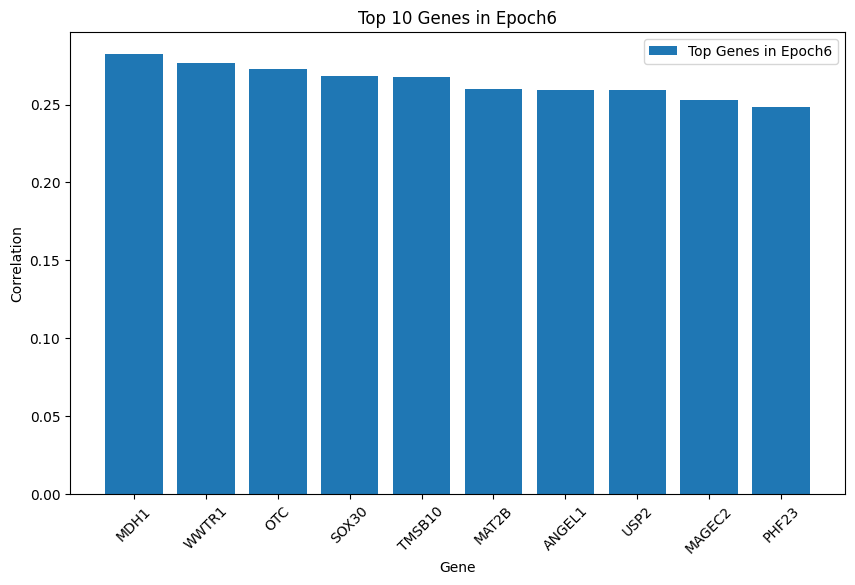

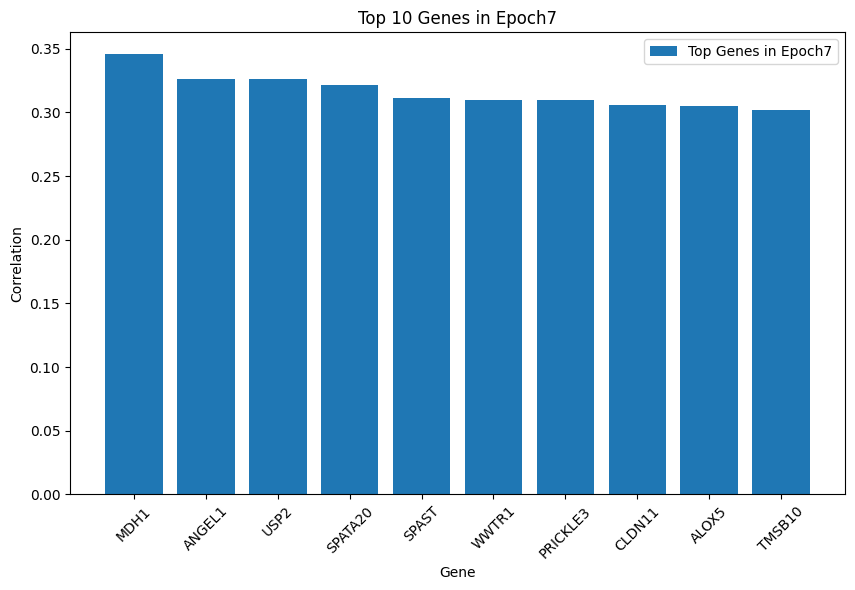

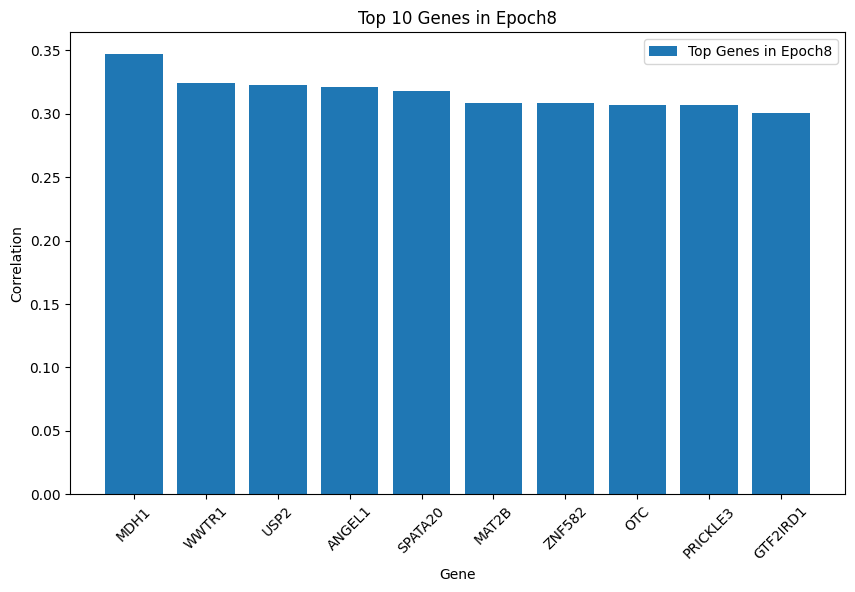

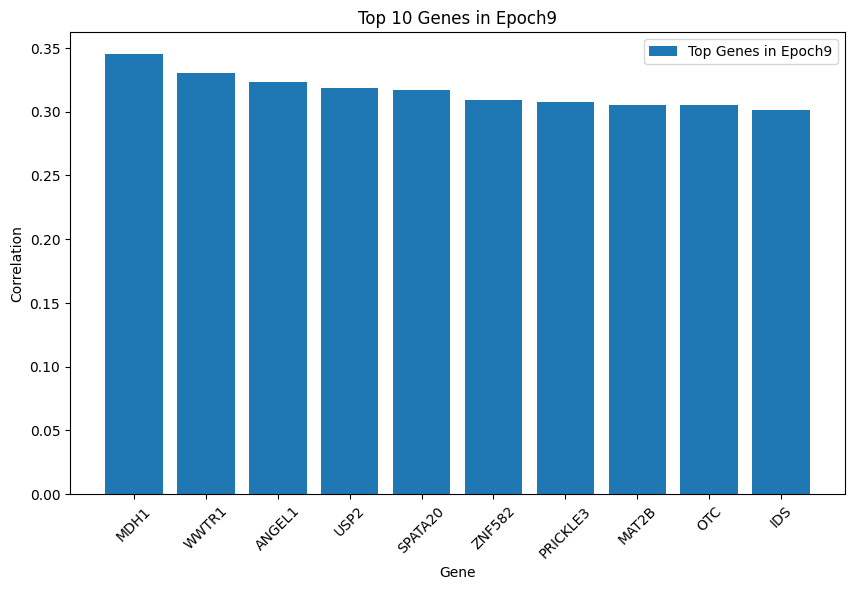

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# First, sort the DataFrame based on 'Epoch' and 'correlation'
df_sorted = df.sort_values(by=['Epoch', 'correlation'], ascending=[True, False])

# Group by 'Epoch' and take the top 10 for each group
top_genes_each_epoch = df_sorted.groupby('Epoch').head(10)

# Plotting
for epoch, data in top_genes_each_epoch.groupby('Epoch'):
    plt.figure(figsize=(10, 6))  # Create a new figure for each epoch
    plt.bar(data['gene'], data['correlation'], label=f"Top Genes in {epoch}")
    plt.title(f"Top 10 Genes in {epoch}")
    plt.ylabel('Correlation')
    plt.xlabel('Gene')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


In [24]:
# Create a dictionary to store top genes for each epoch
top_genes_dict = {}
for epoch, data in top_genes_each_epoch.groupby('Epoch'):
    top_genes_dict[epoch] = set(data['gene'])

# Function to calculate Jaccard similarity
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

# Get sorted list of epochs
sorted_epochs = sorted(top_genes_dict.keys())

for i in range(len(sorted_epochs)-1):
    current_epoch = sorted_epochs[i]
    next_epoch = sorted_epochs[i+1]
    similarity = jaccard_similarity(top_genes_dict[current_epoch], top_genes_dict[next_epoch]) * 100
    print(f"Jaccard Similarity between {current_epoch} and {next_epoch}: {similarity:.2f}%")

Jaccard Similarity between Epoch1 and Epoch10: 5.26%
Jaccard Similarity between Epoch10 and Epoch11: 66.67%
Jaccard Similarity between Epoch11 and Epoch12: 81.82%
Jaccard Similarity between Epoch12 and Epoch13: 25.00%
Jaccard Similarity between Epoch13 and Epoch14: 33.33%
Jaccard Similarity between Epoch14 and Epoch15: 100.00%
Jaccard Similarity between Epoch15 and Epoch16: 66.67%
Jaccard Similarity between Epoch16 and Epoch17: 66.67%
Jaccard Similarity between Epoch17 and Epoch2: 17.65%
Jaccard Similarity between Epoch2 and Epoch3: 81.82%
Jaccard Similarity between Epoch3 and Epoch4: 100.00%
Jaccard Similarity between Epoch4 and Epoch5: 66.67%
Jaccard Similarity between Epoch5 and Epoch6: 81.82%
Jaccard Similarity between Epoch6 and Epoch7: 33.33%
Jaccard Similarity between Epoch7 and Epoch8: 42.86%
Jaccard Similarity between Epoch8 and Epoch9: 81.82%


In [25]:
import numpy as np
from Levenshtein import distance as levenshtein_distance

# Create a dictionary to store top genes for each epoch
top_genes_dict = {}
for epoch, data in top_genes_each_epoch.groupby('Epoch'):
    top_genes_dict[epoch] = list(data['gene'])

# Function to calculate normalized Levenshtein similarity
def levenshtein_similarity(list1, list2):
    distance = levenshtein_distance(''.join(list1), ''.join(list2))
    # Normalizing the distance by the length of the longer sequence
    longest_length = max(len(list1), len(list2))
    if longest_length == 0:  # Avoid division by zero
        return 1.0
    return (longest_length - distance) / longest_length

# Get sorted list of epochs
sorted_epochs = sorted(top_genes_dict.keys())

for i in range(len(sorted_epochs)-1):
    current_epoch = sorted_epochs[i]
    next_epoch = sorted_epochs[i+1]
    similarity = levenshtein_similarity(top_genes_dict[current_epoch], top_genes_dict[next_epoch]) * 100
    print(f"Levenshtein Similarity between epochs {current_epoch} and {next_epoch}: {similarity:.2f}%")


Levenshtein Similarity between epochs Epoch1 and Epoch10: -390.00%
Levenshtein Similarity between epochs Epoch10 and Epoch11: -80.00%
Levenshtein Similarity between epochs Epoch11 and Epoch12: -110.00%
Levenshtein Similarity between epochs Epoch12 and Epoch13: -340.00%
Levenshtein Similarity between epochs Epoch13 and Epoch14: -200.00%
Levenshtein Similarity between epochs Epoch14 and Epoch15: -240.00%
Levenshtein Similarity between epochs Epoch15 and Epoch16: -250.00%
Levenshtein Similarity between epochs Epoch16 and Epoch17: -200.00%
Levenshtein Similarity between epochs Epoch17 and Epoch2: -330.00%
Levenshtein Similarity between epochs Epoch2 and Epoch3: -210.00%
Levenshtein Similarity between epochs Epoch3 and Epoch4: -80.00%
Levenshtein Similarity between epochs Epoch4 and Epoch5: -140.00%
Levenshtein Similarity between epochs Epoch5 and Epoch6: -190.00%
Levenshtein Similarity between epochs Epoch6 and Epoch7: -360.00%
Levenshtein Similarity between epochs Epoch7 and Epoch8: -310.